# BOSTON _HOUSE_PRICE_PREDICTOR

In [1]:
#import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from joblib import dump, load


In [3]:
#read csv

In [4]:
housing = pd.read_csv("/home/killerivy/Desktop/anacondaproj/bostonhousing/boston.csv")

In [5]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
#CRIM = per capita crime rate by town
#ZN = proportion of presidential land zoned for lots over 25,000 sq.ft.
#INDUS = proportion of non-retail business acres per town
#CHAS = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise
#NOX = nitric oxides concentration (parts per 10 million)
#RM = average number of rooms per dwelling
#AGE = proportion of owner-occupied units built prior to 1940
#DIS = weighted distances to five Boston employment centres
#RAD = index of accessibility to radial highways
#TAX = full-value property-tax rate per $10,000
#MEDV = Median value of owner-occupied homes in $1000's
#LSTAT = % lower status of the population
#B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#PTRATIO = pupil-teacher ratio by town

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [9]:
housing['CHAS'].value_counts()

0    476
1     35
Name: CHAS, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f524c397f10>,
      dtype=object)

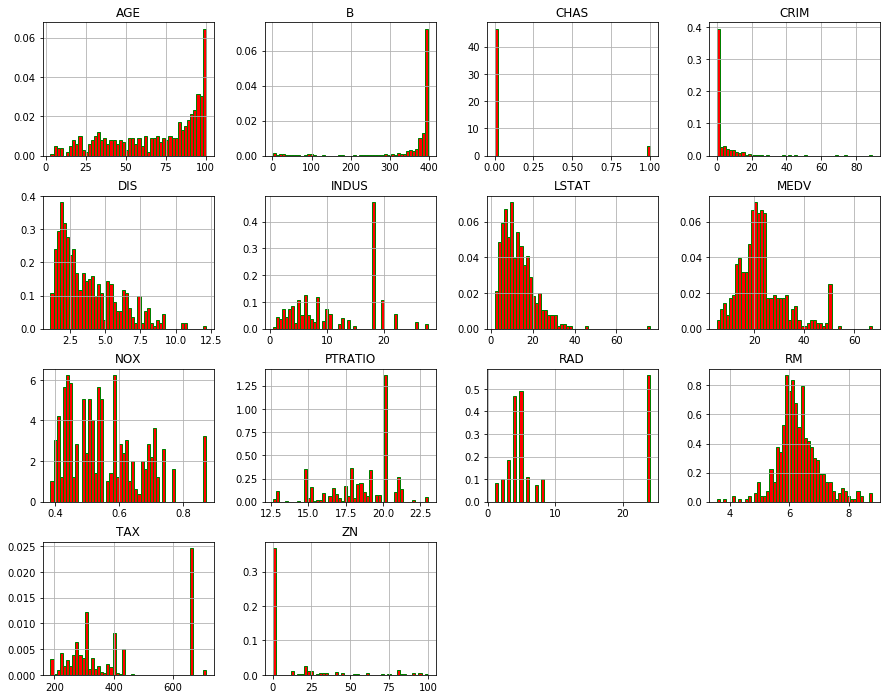

In [10]:
housing.hist(bins= 50 ,figsize=(15,12),density= True,facecolor='red',edgecolor='green')

In [11]:
#splitting train and test data

In [12]:
train_set, test_set = train_test_split(housing,test_size=0.2,random_state = 42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}")

Rows in train set:408
Rows in test set:103


In [13]:
split = StratifiedShuffleSplit(n_splits =1 ,test_size =0.2, random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    96
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    380
1     28
Name: CHAS, dtype: int64

In [16]:
housing1 = strat_train_set.copy()

In [17]:
# correlations

In [18]:
corr_matrix = housing1.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.681481
B          0.350283
ZN         0.341767
DIS        0.250670
CHAS       0.191563
AGE       -0.366230
RAD       -0.381955
CRIM      -0.395849
NOX       -0.425104
TAX       -0.467171
PTRATIO   -0.475870
INDUS     -0.481414
LSTAT     -0.720350
Name: MEDV, dtype: float64

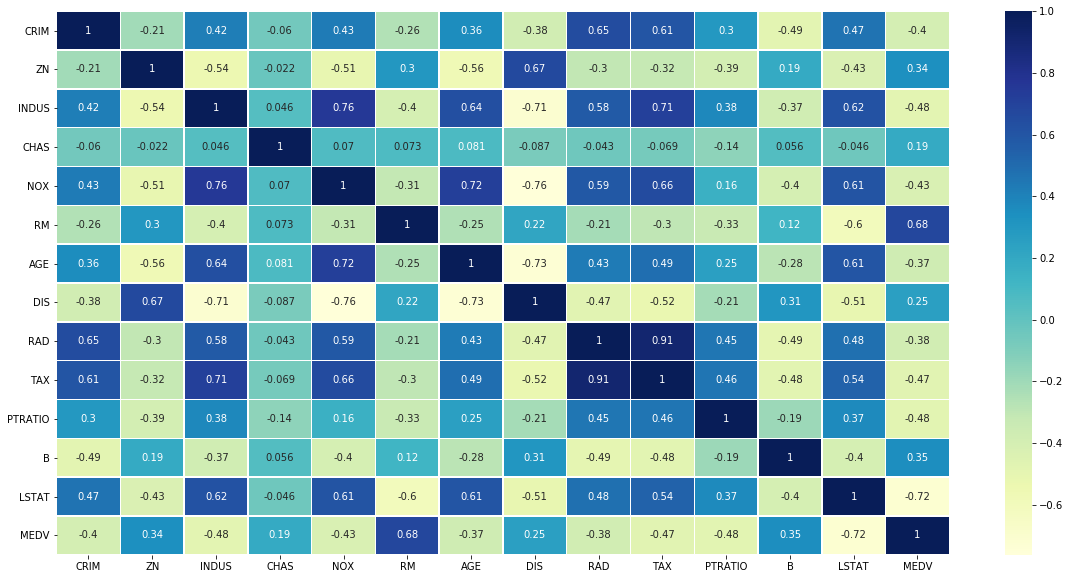

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot = True,linewidth=.5,cmap='YlGnBu')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f524a834410>,
      dtype=object)

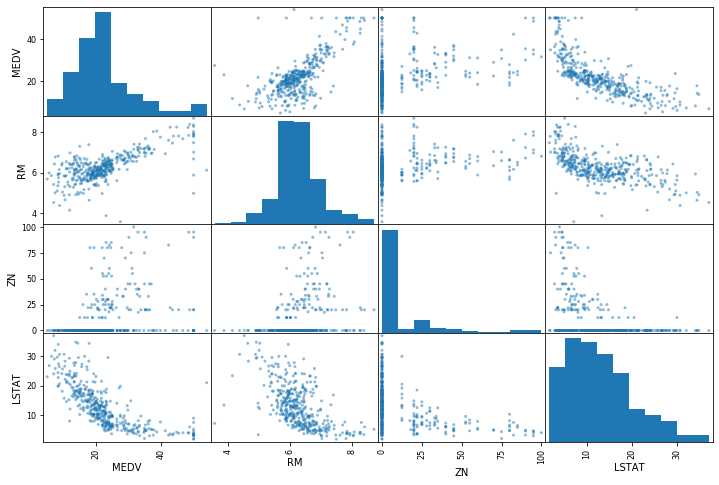

In [20]:
attributes = ['MEDV','RM',"ZN",'LSTAT']
scatter_matrix(housing1[attributes],figsize=(12,8))

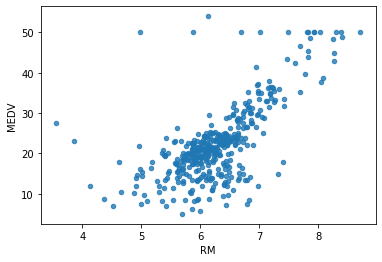

In [21]:
housing1.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

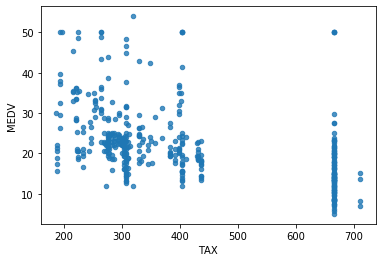

In [22]:
housing1.plot(kind="scatter", x="TAX", y="MEDV", alpha=0.8)

In [23]:
# TRYING OUT ATTRIBUTE COMBINATIONS

In [24]:
housing1['TAXRM'] = housing1['TAX']/housing1['RM']

In [25]:
housing1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1,68.959436
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,187.026116
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03,31.1,38.970588
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9,NaN


In [26]:
housing1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,408.000000,408.000000,408.00000,408.000000,408.000000,403.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,403.000000
mean,3.574915,10.730392,11.37527,0.068627,0.558200,6.269007,69.169363,3.738277,9.666667,411.227941,18.500245,353.601397,12.920907,22.394363,67.621814
std,8.066171,22.067428,6.83855,0.253130,0.116078,0.703808,28.275511,2.085949,8.716483,168.222809,2.143483,95.566677,7.230954,9.366740,31.580171
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.087962,0.000000,5.32000,0.000000,0.453000,5.876500,45.075000,2.062000,4.000000,284.000000,17.400000,374.617500,6.927500,16.475000,45.015779
50%,0.286735,0.000000,9.90000,0.000000,0.538000,6.208000,77.950000,3.107300,5.000000,335.000000,19.050000,390.980000,11.705000,21.000000,53.867403
75%,3.716457,12.500000,18.10000,0.000000,0.625750,6.629500,94.150000,4.978850,24.000000,666.000000,20.200000,395.645000,17.272500,25.000000,98.673976
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,36.980000,54.000000,187.026116


In [27]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 495 to 455
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     408 non-null    float64
 1   ZN       408 non-null    float64
 2   INDUS    408 non-null    float64
 3   CHAS     408 non-null    int64  
 4   NOX      408 non-null    float64
 5   RM       403 non-null    float64
 6   AGE      408 non-null    float64
 7   DIS      408 non-null    float64
 8   RAD      408 non-null    int64  
 9   TAX      408 non-null    int64  
 10  PTRATIO  408 non-null    float64
 11  B        408 non-null    float64
 12  LSTAT    408 non-null    float64
 13  MEDV     408 non-null    float64
 14  TAXRM    403 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 51.0 KB


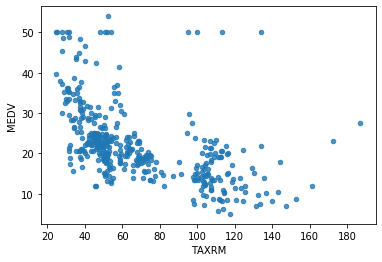

In [28]:
housing1.plot(kind='scatter',x='TAXRM',y= 'MEDV',alpha=0.8)

In [29]:
housing1 = strat_train_set.drop(columns='MEDV')
housing1.shape

(408, 13)

In [30]:
housing1_labels = strat_train_set['MEDV'].copy()

In [31]:
housing1_labels.shape

(408,)

In [32]:
#missing attibutes

In [33]:
imputer = SimpleImputer(strategy="median")
imputer.fit(housing1)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20800e+00, 7.79500e+01, 3.10730e+00, 5.00000e+00, 3.35000e+02,
       1.90500e+01, 3.90980e+02, 1.17050e+01])

In [35]:
X = imputer.transform(housing1)

In [36]:
housing_tr = pd.DataFrame(X,columns = housing1.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,408.000000,408.000000,408.00000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.574915,10.730392,11.37527,0.068627,0.558200,6.268260,69.169363,3.738277,9.666667,411.227941,18.500245,353.601397,12.920907
std,8.066171,22.067428,6.83855,0.253130,0.116078,0.699504,28.275511,2.085949,8.716483,168.222809,2.143483,95.566677,7.230954
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.087962,0.000000,5.32000,0.000000,0.453000,5.878750,45.075000,2.062000,4.000000,284.000000,17.400000,374.617500,6.927500
50%,0.286735,0.000000,9.90000,0.000000,0.538000,6.208000,77.950000,3.107300,5.000000,335.000000,19.050000,390.980000,11.705000
75%,3.716457,12.500000,18.10000,0.000000,0.625750,6.626000,94.150000,4.978850,24.000000,666.000000,20.200000,395.645000,17.272500
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,36.980000


In [38]:
housing_tr.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [39]:
#create pipeline 

In [40]:
M_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                      ('std_scaler', StandardScaler())])

In [41]:
housing_num_tr = M_pipeline.fit_transform(housing1)

In [42]:
housing_num_tr.shape

(408, 13)

In [43]:
model = RandomForestRegressor(random_state=42)
model.fit(housing_num_tr,housing1_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [44]:
housing_prediction = model.predict(housing_num_tr)

In [45]:
rmse = mean_squared_error(housing1_labels,housing_prediction,squared =False)
rmse

1.5664222332261162

In [46]:
mse1 = mean_squared_error(housing1_labels,housing_prediction)
mse1

2.4536786127450934

In [47]:
mse2 = mean_squared_log_error(housing1_labels,housing_prediction)
mse2 = np.sqrt(mse2)

In [48]:
mse2

0.06768042923328092

In [52]:
cv = KFold(n_splits=10, random_state= 42,shuffle =True)
scores1 = cross_val_score(model,housing_num_tr,housing1_labels,scoring = "neg_mean_squared_log_error",cv = cv)
rsmle_score = np.sqrt(-scores1)
rsmle_score

array([0.15597373, 0.21871764, 0.15000007, 0.18942976, 0.1406624 ,
       0.11366491, 0.15411494, 0.15639096, 0.26454341, 0.09602428])

In [53]:
def print_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standard deviation:",scores.std())

In [54]:
print_scores(rsmle_score)

scores: [0.15597373 0.21871764 0.15000007 0.18942976 0.1406624  0.11366491
 0.15411494 0.15639096 0.26454341 0.09602428]
mean: 0.16395221071519833
standard deviation: 0.04675964299344174


In [55]:
#saving model

In [57]:
dump(model,'boston1.joblib')

['boston1.joblib']

In [58]:
#testing on test set

In [59]:
X_test = strat_test_set.drop(columns = "MEDV")
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = M_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_msle = mean_squared_log_error(Y_test,final_predictions)
final_rmsle = np.sqrt(final_msle)

In [60]:
final_rmsle

0.15973797914683982

In [62]:
##### as we have saved model using using joblib we can just unpickle the model for furthur use

In [64]:
from joblib import dump, load
import numpy as np
model = load('boston1.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([23.633])